# Autism Classification Model  

***KJ MoChroi 
DSC 680 Spring 2023  
Bellevue University***

**Change Control Log:**  

Change #: 1  
Change(s) Made:  Found and imported dataset. Created model.  
Date of Change:  3/26/2023  


Change #: 2  
Change(s) Made:  Added cross-fold validation to investigate the suspiciously high accuracy.  
Date of Change:  3/28/2023  

In [1]:
# libraries
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = arff.loadarff("Autism-Adult-Data.arff")
df = pd.DataFrame(data[0])

In [3]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

Text(0.5, 1.0, 'Distribution of Age')

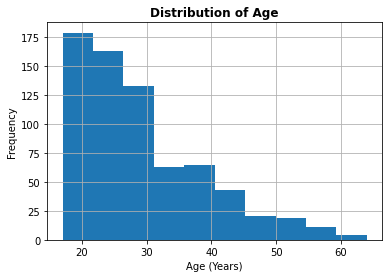

In [4]:
df_filtered = df[df['age'] <= 100]
df_filtered['age'].hist()
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Age',
          fontweight ="bold")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

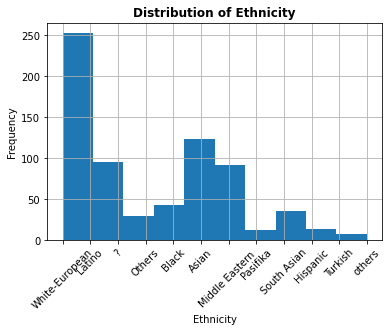

In [5]:
df['ethnicity'].hist()
plt.xlabel('Ethnicity')
plt.ylabel('Frequency')
plt.title('Distribution of Ethnicity',
          fontweight ="bold")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Distribution of Sex')

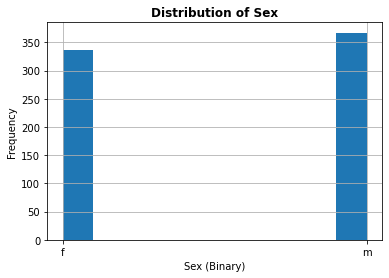

In [6]:
df['gender'].hist()
plt.xlabel('Sex (Binary)')
plt.ylabel('Frequency')
plt.title('Distribution of Sex',
          fontweight ="bold")

In [7]:
df.shape

(704, 21)

In [8]:
# make a dataframe with just the training and target features
df = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD']]

In [9]:
# Convert byte columns into strings
df_convert = pd.DataFrame()

for col in df.columns:
    df_convert[col] = df[col].str.decode("utf-8")

In [10]:
df = df_convert
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,NO
1,1,1,0,1,0,0,0,1,0,1,NO
2,1,1,0,1,1,0,1,1,1,1,YES
3,1,1,0,1,0,0,1,1,0,1,NO
4,1,0,0,0,0,0,0,1,0,0,NO


In [11]:
df.dtypes

A1_Score     object
A2_Score     object
A3_Score     object
A4_Score     object
A5_Score     object
A6_Score     object
A7_Score     object
A8_Score     object
A9_Score     object
A10_Score    object
Class/ASD    object
dtype: object

In [12]:
df['A1_Score'] = df['A1_Score'].astype('int')

In [13]:
for col in df.columns:
    if col != 'Class/ASD':
        df[col] = df[col].astype('int')
        
df['Class/ASD'] = df['Class/ASD'].astype('str')

df.dtypes

A1_Score      int32
A2_Score      int32
A3_Score      int32
A4_Score      int32
A5_Score      int32
A6_Score      int32
A7_Score      int32
A8_Score      int32
A9_Score      int32
A10_Score     int32
Class/ASD    object
dtype: object

In [14]:
df['Class/ASD'].replace('YES', 1, inplace = True)
df['Class/ASD'].replace('NO', 0, inplace = True)
df.dtypes

A1_Score     int32
A2_Score     int32
A3_Score     int32
A4_Score     int32
A5_Score     int32
A6_Score     int32
A7_Score     int32
A8_Score     int32
A9_Score     int32
A10_Score    int32
Class/ASD    int64
dtype: object

Text(0.5, 1.0, 'Distribution of Target Feature')

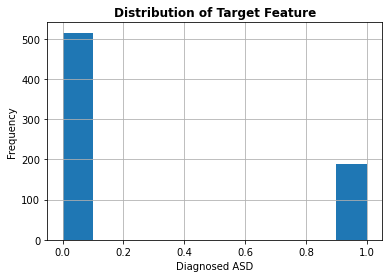

In [15]:
df['Class/ASD'].hist()
plt.xlabel('Diagnosed ASD')
plt.ylabel('Frequency')
plt.title('Distribution of Target Feature',
          fontweight ="bold")

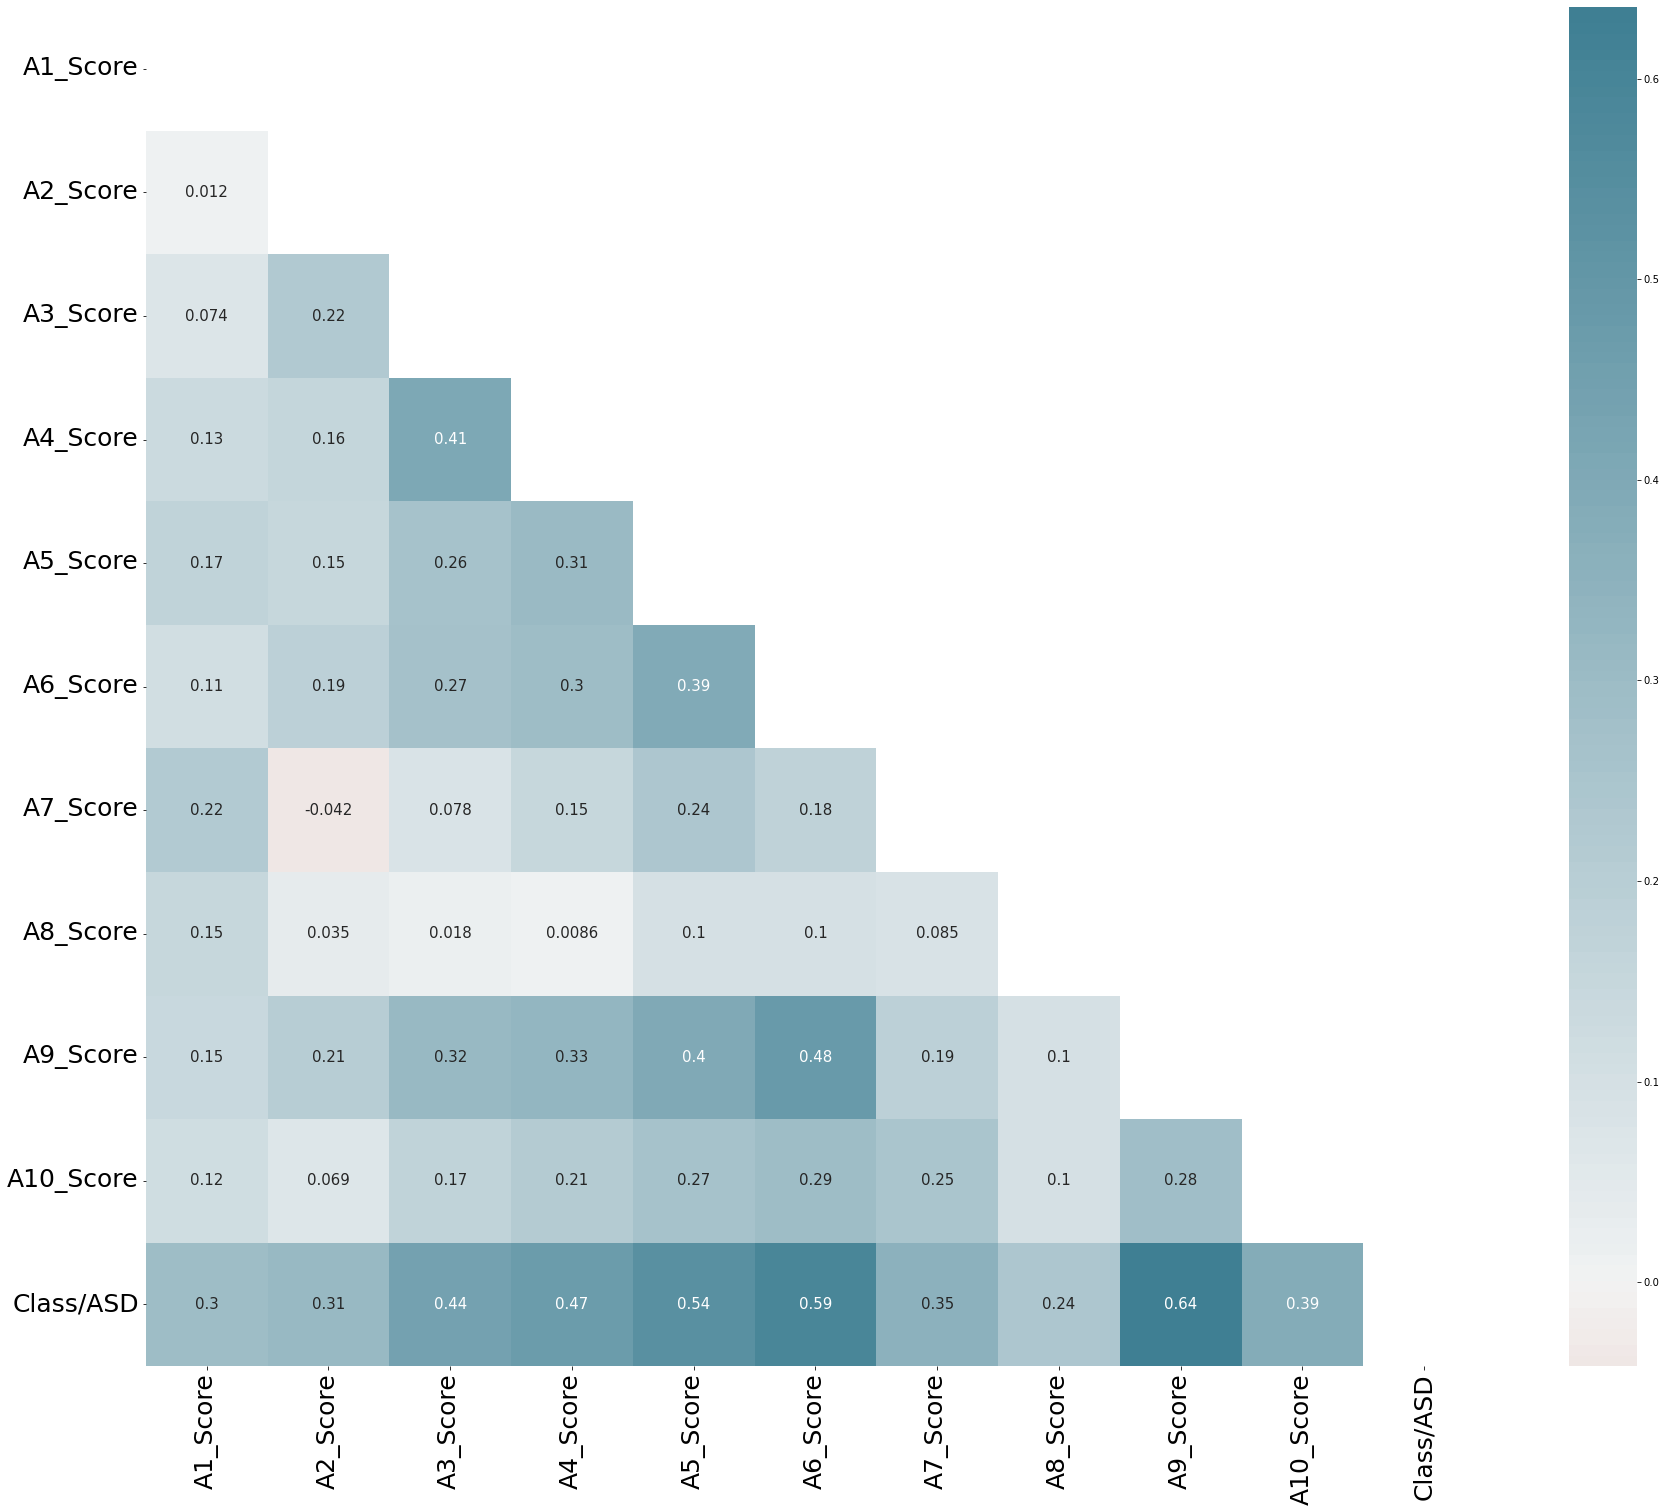

In [16]:
# Define figure sizes and axis label sizes/ticks
plt.figure(figsize = (30,25))
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
# Use a mask on the upper triangle for readability (triu - upper triangle vs tril - lower triangle)
mask = np.triu(np.ones_like(df_convert.corr(), dtype=bool))
# Create heatmap
sns.heatmap(df_convert.corr(method = 'pearson'),
            cmap=sns.diverging_palette(20, 220, n=200), 
            center = 0,
            mask = mask,
            annot= True,
            annot_kws = {"size": 15}
           )
plt.show()

'In fact, a Pearson correlation coefficient estimated for two binary variables will return the phi coefficient.''
https://en.m.wikipedia.org/wiki/Phi_coefficient

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html

## The Model

In [17]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [18]:
training_features = df.drop(['Class/ASD'], axis =1)
target_feature = df['Class/ASD']

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(training_features, target_feature, test_size=0.3, random_state=90) 

In [20]:
#Import svm model
from sklearn import svm

In [21]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

In [22]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC()

In [23]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [25]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9858490566037735


In [26]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [27]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 

model 1 AUC score: 0.9792303338992642


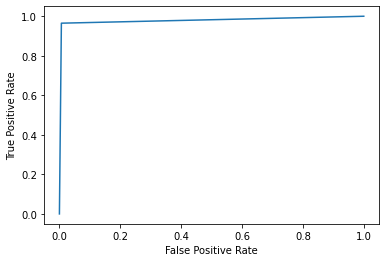

In [28]:
plot_roc_curve(y_test, y_pred)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred)}') 

https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

In [29]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.869 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.898 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.727 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [30]:

# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [31]:
grid_predictions = grid.predict(X_test)
  
print("Accuracy:",metrics.accuracy_score(y_test, grid_predictions))

Accuracy: 1.0


In [32]:
clf_best =  svm.SVC(C=2, kernel='rbf', gamma=0.1)

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_best, training_features, target_feature, cv=5)
scores

array([1.        , 0.9858156 , 0.9929078 , 1.        , 0.99285714])

In [34]:
scores.mean()

0.9943161094224923

model 1 AUC score: 1.0


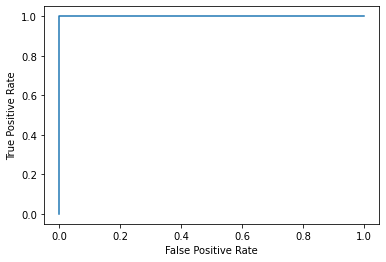

In [35]:
plot_roc_curve(y_test, grid_predictions)
print(f'model 1 AUC score: {roc_auc_score(y_test, grid_predictions)}') 